In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
logs = glob.glob("Players_Data_teach_ingestion/*.npy")

In [3]:
ingested = []
ingested_successfully = []

for log in logs:
    logdata = np.load(log, allow_pickle=True)
    for logval in logdata:
        if len(logval) > 2 and logval[0] == 9:
            ingested.append(log)
            if logval[2] == 10:
                ingested_successfully.append(log)
                
ingested = list(set(ingested))
ingested_successfully = list(set(ingested_successfully))

In [4]:
len(ingested), len(ingested_successfully)

(964, 430)

In [5]:
ingested_successfully = sorted(ingested_successfully, key=lambda x: int(x.split("/")[1].split("-")[0]))

In [6]:
ingestion_with_tob = {}

for agent in ingested_successfully:
    tob = int(os.path.basename(agent).split("-")[0])
    if tob in ingestion_with_tob.keys():
        ingestion_with_tob[tob] += 1
    else:
        ingestion_with_tob[tob] = 1

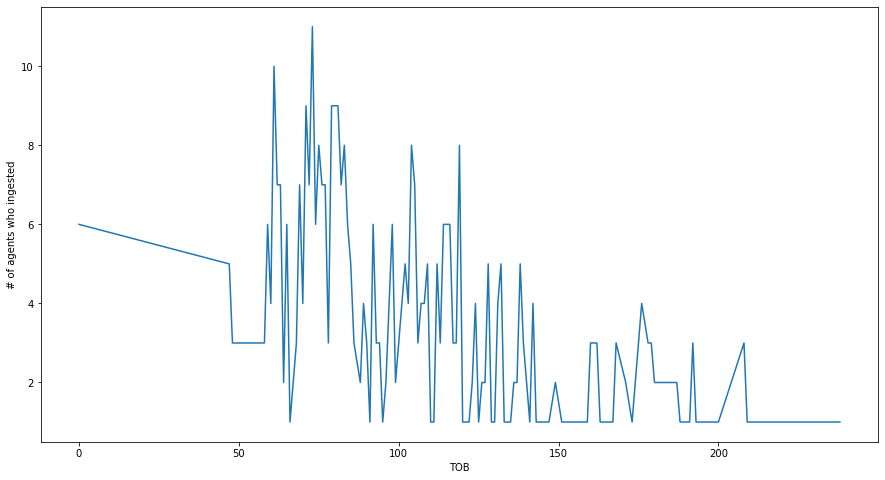

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(list(ingestion_with_tob.keys()), list(ingestion_with_tob.values()))
plt.xlabel('TOB')
plt.ylabel('# of agents who ingested')
plt.show()